In [192]:
# Loading the dataset and Importing the neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path =  r"C:\Users\USER\Downloads\entropi_supermarkets_data.csv"
df = pd.read_csv(path)  

In [193]:
# Checking for data shape
df.shape

(6435, 13)

In [194]:
# Checking top 5 rows
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Product_Category,Profit,Quantity,Mode_of_Sale,Mode_of_Payment
0,Mutare,2025-01-28,166381.87,1,16.2,3.72,138.79,3.5,NaN,560.86,1.0,In-Store,NaN
1,Mbeya,2024-04-05,187928.14,1,11.9,1.09,107.19,12.2,Furniture,1371.46,7.0,NaN,Card Payment
2,Chimoio,2022-05-28,unknown,1,15.1,3.88,103.33,7.7,Beverages,24.50,7.0,NaN,NaN
3,Gaborone,2021-07-15,NaN,0,17.0,1.63,176.58,21.9,Furniture,-327.31,10.0,In-Store,Mobile Transfer
4,Nakuru,2022-08-05,34014.6,1,29.0,1.29,179.93,19.0,Furniture,1092.58,1.0,In-Store,Card Payment


In [195]:
# Checking bottom 5 rows
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Product_Category,Profit,Quantity,Mode_of_Sale,Mode_of_Payment
6430,Dar_es_Salaam,2022-03-28,20708.46,0,39.2,3.18,196.35,8.9,Furniture,1249.65,10.0,Online,Card Payment
6431,Lusaka,2021-09-23,62136.82,0,31.6,4.41,127.83,3.7,Clothing,NaN,4.0,In-Store,Cash
6432,Mutare,NaN,169207.59,0,21.9,3.37,105.18,13.6,Clothing,-3.97,5.0,In-Store,Cash
6433,Gaborone,2022-03-02,14757.25,1,18.4,4.55,135.17,6.0,Furniture,-435.43,9.0,In-Store,Cash
6434,Eldoret,unknown,135117.52,0,28.1,4.08,145.78,19.1,NaN,557.53,4.0,In-Store,Card Payment


In [196]:
# Checking the field names of the data
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Product_Category', 'Profit',
       'Quantity', 'Mode_of_Sale', 'Mode_of_Payment'],
      dtype='object')

In [197]:
# Checking for data types
df.dtypes

Store                object
Date                 object
Weekly_Sales         object
Holiday_Flag         object
Temperature          object
Fuel_Price           object
CPI                  object
Unemployment         object
Product_Category     object
Profit              float64
Quantity            float64
Mode_of_Sale         object
Mode_of_Payment      object
dtype: object

In [198]:
# Checking for over all information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store             6340 non-null   object 
 1   Date              6196 non-null   object 
 2   Weekly_Sales      5960 non-null   object 
 3   Holiday_Flag      6299 non-null   object 
 4   Temperature       6203 non-null   object 
 5   Fuel_Price        6189 non-null   object 
 6   CPI               6184 non-null   object 
 7   Unemployment      6189 non-null   object 
 8   Product_Category  5488 non-null   object 
 9   Profit            5797 non-null   float64
 10  Quantity          5807 non-null   float64
 11  Mode_of_Sale      5940 non-null   object 
 12  Mode_of_Payment   5732 non-null   object 
dtypes: float64(2), object(11)
memory usage: 653.7+ KB


In [199]:
# Looking for the total count of missing values for each column and presenting them as a frame
df.isna().sum().to_frame(name="Missing Values").style.background_gradient(cmap="Reds")


,Missing Values
Store,95
Date,239
Weekly_Sales,475
Holiday_Flag,136
Temperature,232
Fuel_Price,246
CPI,251
Unemployment,246
Product_Category,947
Profit,638


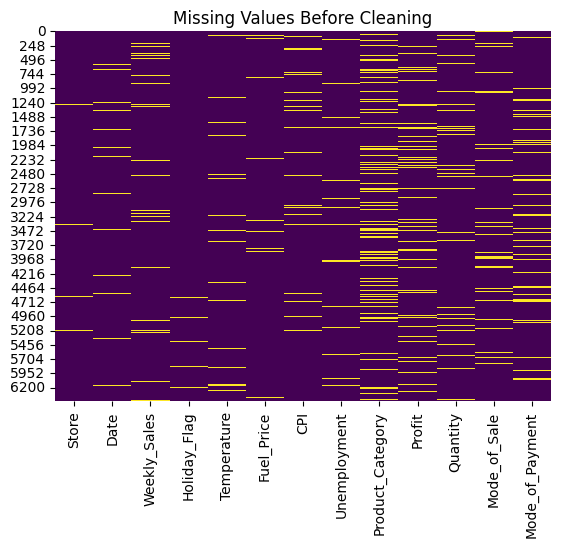

In [200]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Before Cleaning")
plt.savefig("missing_values_before _cleaning.jpg", format = 'jpg')
plt.show()


In [201]:
# Get the descriptive statistics of the numeric data
df.describe()

,Profit,Quantity
count,5797.000000,5807.000000
mean,506.300773,5.514551
std,573.274660,2.854688
min,-499.700000,1.000000
25%,11.060000,3.000000
50%,505.100000,5.000000
75%,1007.110000,8.000000
max,1499.750000,10.000000


In [202]:
# Change Date column to datetime for better time series analysis
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [203]:
#Convert Weekly_Sales, Temperature, Fuel_Price, CPI and Unemployment to numeric form
cols_to_convert = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [204]:
# Change Store,Product_Category, Mode_of_Sale and Mode of Payment to category type for efficient memory usage and quick analysis
categorical_cols = ['Store', 'Product_Category', 'Mode_of_Sale', 'Mode_of_Payment']
df[categorical_cols] = df[categorical_cols].astype('category')


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Store             6340 non-null   category      
 1   Date              6114 non-null   datetime64[ns]
 2   Weekly_Sales      5792 non-null   float64       
 3   Holiday_Flag      6299 non-null   object        
 4   Temperature       6114 non-null   float64       
 5   Fuel_Price        6114 non-null   float64       
 6   CPI               6114 non-null   float64       
 7   Unemployment      6114 non-null   float64       
 8   Product_Category  5488 non-null   category      
 9   Profit            5797 non-null   float64       
 10  Quantity          5807 non-null   float64       
 11  Mode_of_Sale      5940 non-null   category      
 12  Mode_of_Payment   5732 non-null   category      
dtypes: category(4), datetime64[ns](1), float64(7), object(1)
memory usage: 479.6+ 

In [206]:
# Create YearMonth column 
df['YearMonth'] = df['Date'].dt.to_period('M')


In [207]:
# Fill the missing CPI values within Store + YearMonth since CPI is updated monthly
df['CPI'] = df.groupby(['Store', 'YearMonth'], observed=False)['CPI'].transform(lambda x: x.ffill().bfill())

# Fill remaining with Store-level patterns
df['CPI'] = df.groupby('Store', observed=False)['CPI'].transform(lambda x: x.ffill().bfill())

# Final fallback fill (global)
df['CPI'] = df['CPI'].ffill().bfill()


In [208]:

# Fill missing values in Unemployment using forward and backward fill within each Store and YearMonth
df['Unemployment'] = df.groupby(['Store', 'YearMonth'], observed=False)['Unemployment'].transform(lambda x: x.ffill().bfill())

# If still missing, try within Store only
df['Unemployment'] = df.groupby('Store', observed=False)['Unemployment'].transform(lambda x: x.ffill().bfill())

# Final fill using overall forward and backward fill
df['Unemployment'] = df['Unemployment'].ffill().bfill()


In [209]:
# Add "Unknown" to the existing categories
df['Store'] = df['Store'].cat.add_categories('Unknown')

# Fill missing values in Store field with "Unknown"
df['Store'] = df['Store'].fillna('Unknown')


In [210]:
# Sort by Store and Date
df = df.sort_values(['Store', 'Date'])

# Fix missing Date values using 7-day intervals since data is on weekly basis
df['Date'] = (
    df.groupby('Store', observed=False)['Date']
      .transform(lambda group: group.ffill() + pd.to_timedelta(group.isna().cumsum() * 7, unit='D'))
)




In [211]:
# Filling the missing values in Weekly_Sales field.  First we fill using Store + Week mean 
# Create a 'Week' column from the 'Date' to group by week
df['Week'] = df['Date'].dt.isocalendar().week

# Fill missing Weekly_Sales with the mean for each Store and Week
df['Weekly_Sales'] = df.groupby(['Store', 'Week'], observed=False)['Weekly_Sales'].transform(lambda x: x.fillna(x.mean()))

# Fallback: fill remaining NaNs using overall Store average
df['Weekly_Sales'] = df.groupby('Store', observed=False)['Weekly_Sales'].transform(lambda x: x.fillna(x.mean()))


In [212]:

# Fill missing with 'Unknown'
df['Holiday_Flag'] = df['Holiday_Flag'].fillna('Unknown')
# Convert to bool Type
df['Holiday_Flag'] = df['Holiday_Flag'].astype(bool)


In [213]:
#Create YearWeek column
df['YearWeek'] = df['Date'].dt.strftime('%Y-%U')


In [214]:

#  Fill the missing value in Tempearature field by Store + YearWeek group mean
df['Temperature'] = df.groupby(['Store', 'YearWeek'], observed=False)['Temperature'].transform(
    lambda x: x.fillna(x.mean())
)

# If NaN still exist Fill by Store overall mean
df['Temperature'] = df.groupby('Store', observed=False)['Temperature'].transform(
    lambda x: x.fillna(x.mean())
)

#  Then Fill remaining with global mean (final safety net)
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())




In [215]:
# Fill the missing value in Fuel_Price field  by Store + YearWeek group mean
df['Fuel_Price'] = df.groupby(['Store', 'YearWeek'], observed=False)['Fuel_Price'].transform(
    lambda x: x.fillna(x.mean())
)

# Fill remaining with Store-level mean
df['Fuel_Price'] = df.groupby('Store', observed=False)['Fuel_Price'].transform(
    lambda x: x.fillna(x.mean())
)

#  Fill any leftovers with overall mean
df['Fuel_Price'] = df['Fuel_Price'].fillna(df['Fuel_Price'].mean())


In [216]:
# For the Product_Category field Add 'Unknown' to the category list
df['Product_Category'] = df['Product_Category'].cat.add_categories('Unknown')

# Then Fill missing values with 'Unknown'
df['Product_Category'] = df['Product_Category'].fillna('Unknown')


In [217]:
#  Add 'Unknown' as a valid category
df['Mode_of_Payment'] = df['Mode_of_Payment'].cat.add_categories('Unknown')

# Fill missing values with 'Unknown'
df['Mode_of_Payment'] = df['Mode_of_Payment'].fillna('Unknown')


In [218]:
#  Add 'Unknown' as a valid category
df['Mode_of_Sale'] = df['Mode_of_Sale'].cat.add_categories('Unknown')

#  Fill missing values with 'Unknown'
df['Mode_of_Sale'] = df['Mode_of_Sale'].fillna('Unknown')


In [219]:
#  For the Profit field, fill Missing values based on Store & Week
df['Profit'] = df.groupby(['Store', 'YearWeek'], observed=False)['Profit'].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining with overall Store average
df['Profit'] = df.groupby('Store', observed=False)['Profit'].transform(lambda x: x.fillna(x.mean()))


In [220]:
# Quantity field: Fill Missing Values using Store and YearWeek average
df['Quantity'] = df.groupby(['Store', 'YearWeek'], observed=False)['Quantity'].transform(lambda x: x.fillna(x.mean()))

# Fill remaining using overall Store average
df['Quantity'] = df.groupby('Store', observed=False)['Quantity'].transform(lambda x: x.fillna(x.mean()))


In [221]:
df['YearMonth'] = df['Date'].dt.to_period('M')

In [222]:
#Quick scan of the data after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 1745 to 5395
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Store             6435 non-null   category      
 1   Date              6435 non-null   datetime64[ns]
 2   Weekly_Sales      6435 non-null   float64       
 3   Holiday_Flag      6435 non-null   bool          
 4   Temperature       6435 non-null   float64       
 5   Fuel_Price        6435 non-null   float64       
 6   CPI               6435 non-null   float64       
 7   Unemployment      6435 non-null   float64       
 8   Product_Category  6435 non-null   category      
 9   Profit            6435 non-null   float64       
 10  Quantity          6435 non-null   float64       
 11  Mode_of_Sale      6435 non-null   category      
 12  Mode_of_Payment   6435 non-null   category      
 13  YearMonth         6435 non-null   period[M]     
 14  Week              6435 non

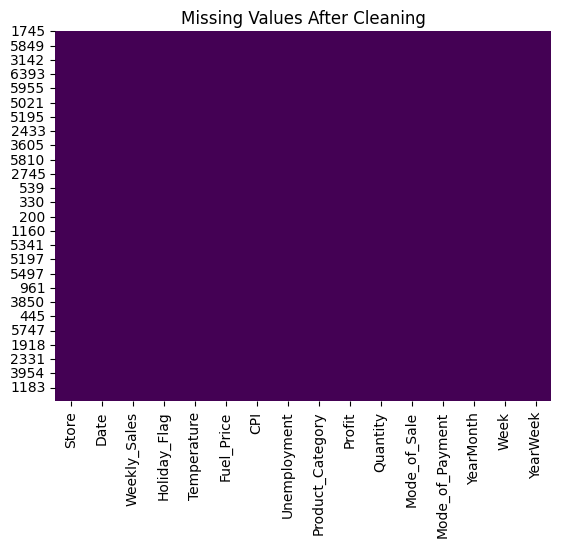

In [223]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values After Cleaning")
plt.savefig("missing_values_after_cleaning.jpg", format = 'jpg')
plt.show()

In [224]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [225]:
# Save the cleaned data as csv file. (Same location as the raw data)
df.to_csv(r"C:\Users\USER\Downloads\clean_entropi_supermarkets_data.csv", index=False)
